# Ciencia de Datos - Trabajo Práctico número 1
## Integrantes
- Ambroa, Nicolás - 229/13 - ambroanicolas@hotmail.com
- Gaustein, Diego - 586/09 - diego@gaustein.com.ar

## Carga y limpieza de datos

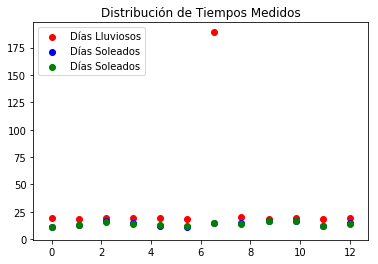

In [46]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt  # Graficos

athlete_times = np.loadtxt(fname='tiempos.txt', skiprows=1)
orig_times_for_sunny_days = athlete_times[:, 1]
orig_times_for_cloudy_days = athlete_times[:, 2]
orig_times_for_rainy_days = athlete_times[:, 3]

colors = ["red", "blue", "green"]
groups = [u"Días Lluviosos", u"Días Soleados", u"Días Soleados"]
x = np.linspace(0, 12, 12)
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1, facecolor="1.0")
subplot.scatter(x=x, y=orig_times_for_rainy_days, c=colors[0], label=groups[0])
subplot.scatter(x=x, y=orig_times_for_sunny_days, c=colors[1], label=groups[1])
subplot.scatter(x=x, y=orig_times_for_cloudy_days, c=colors[2], label=groups[2])
plt.title(u'Distribución de Tiempos Medidos')
plt.legend(loc=2)
plt.show()

El dato de días lluviosos para el atleta 7 parece ser un outlier, por lo que decidimos eliminar esa fila.

In [7]:
times_for_rainy_days = np.delete(orig_times_for_rainy_days, [6])
times_for_sunny_days = np.delete(orig_times_for_sunny_days, [6])
times_for_cloudy_days = np.delete(orig_times_for_cloudy_days, [6])

## Hipótesis

Los t-test requieren como hipótesis que las muestras tengan una distribución normal. Verificamos que esta hipótesis sea razonable con el test de Shapiro-Wilk.

In [75]:
assert stats.shapiro(times_for_sunny_days)[1] > 0.05
assert stats.shapiro(times_for_rainy_days)[1] > 0.05
assert stats.shapiro(times_for_cloudy_days)[1] > 0.05

print("Varianzas:", np.var(times_for_sunny_days), np.var(times_for_cloudy_days), np.var(times_for_rainy_days))

Varianzas: 3.96363636364 3.14727272727 0.189917355372


Vemos que las varianzas de los días soleados y nublados son muy similares, mientras que la de los días nublados difiere bastante. Deberemos tener esto en cuenta a la hora de ver resultados que involucren los datos de días lluviosos.

## ¿Son los atletas son más lentos en días de lluvia que en días soleados?

Usando un related t-test (elegimos ese al tener 2 muestras de la misma poblacion), tratamos de rechazar la hipotesis nula de que ambas muestras tienen identicos valores promedio (esperados).

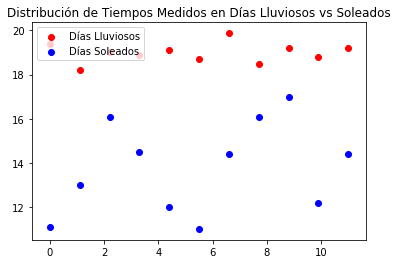

In [10]:
colors = ["red", "blue"]
groups = [u"Días Lluviosos", u"Días Soleados"]
x = np.linspace(0, len(times_for_cloudy_days), len(times_for_cloudy_days))
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1, facecolor="1.0")
subplot.scatter(x=x, y=times_for_rainy_days, c=colors[0], label=groups[0])
subplot.scatter(x=x, y=times_for_sunny_days, c=colors[1], label=groups[1])
plt.title(u'Distribución de Tiempos Medidos en Días Lluviosos vs Soleados')
plt.legend(loc=2)
plt.show()

In [11]:
rel_test = stats.ttest_rel(times_for_rainy_days, times_for_sunny_days)

print("Test de muestras apareadas. t-statistic: %s, p-value: %s" % (rel_test[0], rel_test[1]))

Test de muestras apareadas. t-statistic: 8.16598022999, p-value: 9.83213012775e-06


Como el p-valor es muy chico (menor a 0.01), podemos rechazar la hipotesis nula.
Como el t-estadistico es positivo y grande, sabemos que la media para los tiempos medidos en dias lluviosos
es mayor a la media de los tiempos medidos en dias soleados.
Podemos entonces concluir que los atletas son mas lentos en dias lluviosos que en dias soleados.

# ¿El cielo nublado no influye en los tiempos de los atletas?

Comparamos los tiempos de cada atleta entre un día soleado y un día nublado viendo la resta entre ambos.

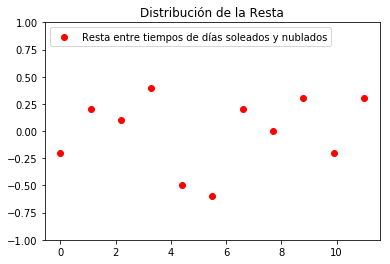

In [12]:
colors = ["red"]
groups = [u"Resta entre tiempos de días soleados y nublados"]
x = np.linspace(0, len(times_for_cloudy_days), len(times_for_cloudy_days))
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1, facecolor="1.0")
resta = times_for_sunny_days - times_for_cloudy_days
subplot.scatter(x=x, y=resta, c=colors[0], label=groups[0])
plt.title(u'Distribución de la Resta')
plt.ylim(-1, 1)
plt.legend(loc=2)
plt.show()

En principio no se aprecia ninguna tendencia evidente. Comparamos ambas muestras usando t-test y test de Wilcoxon

In [13]:
rel_test = stats.ttest_rel(times_for_sunny_days, times_for_cloudy_days)
print("Test de muestras apareadas. t-statistic: %s, p-value: %s" % (rel_test[0], rel_test[1]))
wilco = stats.wilcoxon(times_for_sunny_days, times_for_cloudy_days)
print("Test de Wilcoxon. t-statistic: %s, p-value: %s" % (wilco[0], wilco[1]))

Test de muestras apareadas. t-statistic: 1.60038642373e-15, p-value: 1.0
Test de Wilcoxon. t-statistic: 27.0, p-value: 0.959221134457


Ninguno de estos tests muestran ninguna evidencia de que ambas muestras tengan una distribución similar, por lo que, si el cielo nublado afectase los tiempos de los atletas, no lo hace de manera uniforme. Es posible que atletas en particular tengan diferentes tiempos en días soleados y nublados con una tendencia consistente, pero no es posible determinar eso con los datos que disponemos. Como las diferencias son pequeñas, además, podemos decir que en principio aceptamos la hipótesis de que los días nublados no afectan los tiempos de los atletas.

## ¿La velocidad en dı́as de lluvia es independiente del atleta?

Veamos primero un gráfico de tiempos de días soleados vs tiempos de días nublados.
En azul, la recta que mejor aproxima los datos, y en verde, a modo de comparación, la recta de pendiente a 45 grados

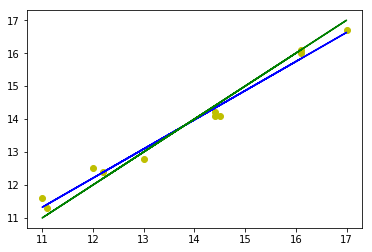

In [32]:
fit = np.polyfit(times_for_sunny_days, times_for_cloudy_days, 1)
fit_fn = np.poly1d(fit)
plt.plot(
    times_for_sunny_days, times_for_cloudy_days, 'yo',
    times_for_sunny_days, fit_fn(times_for_sunny_days), 'b',
    times_for_sunny_days, times_for_sunny_days, 'g'
)
plt.show()

Como es de esperarse, las muestras se ubican sobre una distribución uniforme, de modo que los tiempos de un atleta en un día soleado tienen alta correlación con sus tiempos en un día nublado. Veamos ahora el mismo gráfico pero entre días soleados y lluviosos

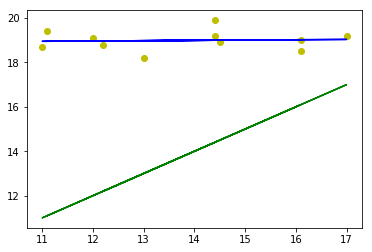

In [35]:
fit = np.polyfit(times_for_sunny_days, times_for_rainy_days, 1)
fit_fn = np.poly1d(fit)
plt.plot(
    times_for_sunny_days, times_for_rainy_days, 'yo',
    times_for_sunny_days, fit_fn(times_for_sunny_days), 'b',
    times_for_sunny_days, times_for_sunny_days, 'g'
)
plt.show()

In [39]:
pearson_sunny_cloudy = stats.pearsonr(times_for_sunny_days, times_for_cloudy_days)
print("Pearson sunny vs cloudy:", pearson_sunny_cloudy)

pearson_sunny_rainy = stats.pearsonr(times_for_sunny_days, times_for_rainy_days)
print("Pearson sunny vs rainy:", pearson_sunny_rainy)

pearson_cloudy_rainy = stats.pearsonr(times_for_cloudy_days, times_for_rainy_days)
print("pearson cloudy vs rainy:", pearson_cloudy_rainy)

Pearson sunny vs cloudy: (0.99224199979513195, 1.8469595486418115e-09)
Pearson sunny vs rainy: (0.064963553876733887, 0.84949358072453474)
pearson cloudy vs rainy: (0.050562234000677657, 0.88263096976959454)


El coeficiente de correlación de Pearson parecería corroborar que los tiempos en los días lluviosos efectivamente no tienen relación con los tiempos en días soleados ni nublados.

## ¿El clima influye en la velocidad de los atletas?

Con los visto en los puntos anteriores sería suficiente para afirmar que sí, pero realicemos de todos modos un análisis de permutaciones sobre los datos. Primero calculamos diferencia entre las medias de días lluviosos y de días no-lluviosos (soleados + nublados). Luego generamos permutaciones al azar entre estos dos grupos (manteniendo las cardinalidades) y dibujamos un histograma de las diferencias de las medias. Finalmente calculamos el p-valor como dos veces el area del histograma a la derecha del valor original.

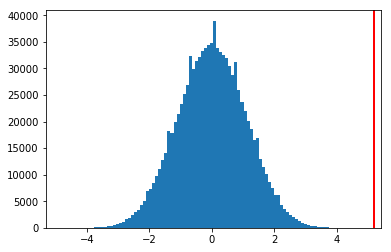

Area comprendida: 0


In [42]:
no_lluvia = np.append(times_for_sunny_days,times_for_cloudy_days)
lluvia = times_for_rainy_days
dif_media_original = np.mean(lluvia) - np.mean(no_lluvia)
diferencias = []

todos = np.append(lluvia, no_lluvia)
for i in range(1000000):
    perm = np.random.permutation(todos)
    lluvia = perm[:len(lluvia)]
    no_lluvia = perm[len(lluvia):]
    diferencias.append(np.mean(lluvia) - np.mean(no_lluvia))

n, bins, patches = plt.hist(diferencias, bins=100)
plt.axvline(x=dif_media_original, ymin=0, color='red', linewidth=2)
plt.show()
print("Area comprendida:", len([dif for dif in diferencias if dif > dif_media_original]) * 2)

## Conclusiones

Se discute si es o no de utilidad entrenar con lluvia. De los datos obtenidos se infiere que los tiempos en los días lluviosos son independientes del atleta; sin embargo esto habla de resultados y no de la utilidad relativa del entrenamiento con respecto al clima.

Una forma de evalúar esto sería separar los atletas en dos grupos g1 y g2. A g1 se lo podria entrenar en dias de lluvia (o simulando un ambiente de lluvia), mientras que a g2 se lo podria entrenar en dias soleados y nublados,
realizando un entrenamiento identico en todo otro aspecto, y analizando la evolución de los atletas en ciertas variables de interés -- tiempos de carrera, masa muscular, pruebas de resistencia, etc.